In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("logistic_regression.csv")
df.head()

,Unnamed: 0,text,sentiment
0,0,last session day,neutral
1,1,shanghai also realli excit precis skyscrap...,neutral
2,2,recess hit veroniqu branquinho quit company ...,neutral
3,3,happi bday,neutral
4,4,I like it,neutral


In [2]:
df.describe()

,Unnamed: 0
count,3534.000000
mean,1766.500000
std,1020.322253
min,0.000000
25%,883.250000
50%,1766.500000
75%,2649.750000
max,3533.000000


In [3]:
df.shape

(3534, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
Unnamed: 0    3534 non-null int64
text          3533 non-null object
sentiment     3534 non-null object
dtypes: int64(1), object(2)
memory usage: 82.9+ KB


In [5]:
df.dropna(axis = 0,inplace = True)
df.shape

(3533, 3)

# Data Preprocesssing

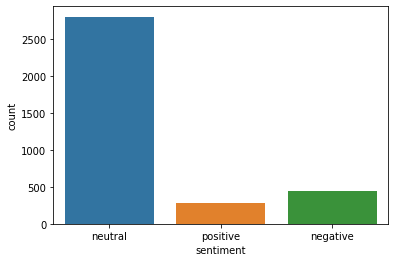

In [6]:
sns.countplot(df['sentiment'])

In [7]:
#removal of stop words
import nltk #nlp library
from nltk.corpus import stopwords
stop = stopwords.words("english")
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,Unnamed: 0,text,sentiment
0,0,last session day,neutral
1,1,shanghai also realli excit precis skyscrap gal...,neutral
2,2,recess hit veroniqu branquinho quit company shame,neutral
3,3,happi bday,neutral
4,4,I like,neutral


In [8]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,Unnamed: 0,text,sentiment
0,0,last session day,neutral
1,1,shanghai also realli excit preci skyscrap galo...,neutral
2,2,recess hit veroniqu branquinho quit compani shame,neutral
3,3,happi bday,neutral
4,4,I like,neutral


In [9]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df.head()

,Unnamed: 0,text,sentiment
0,0,last session day,neutral
1,1,shanghai also realli excit preci skyscrap galo...,neutral
2,2,recess hit veroniqu branquinho quit compani shame,neutral
3,3,happi bday,neutral
4,4,I like,neutral


In [10]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    text = re.sub('http?://[A-Za-z0-9./]+','',text) #removes any https links
    return text
df['text'] = df['text'].apply(remove_punct)
df.head()

,Unnamed: 0,text,sentiment
0,0,last session day,neutral
1,1,shanghai also realli excit preci skyscrap galo...,neutral
2,2,recess hit veroniqu branquinho quit compani shame,neutral
3,3,happi bday,neutral
4,4,I like,neutral


In [11]:
#Spell correction
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                     last session day
1    shanghai also really exit press skyscrap valor...
2    recess hit veroniqu branquinho quit company shame
3                                            happy day
4                                               I like
Name: text, dtype: object

In [12]:
#capitalizing the tweets
df['text'] = df['text'].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df['text'].head()

0                                     LAST SESSION DAY
1    SHANGHAI ALSO REALLI EXCIT PRECI SKYSCRAP GALO...
2    RECESS HIT VERONIQU BRANQUINHO QUIT COMPANI SHAME
3                                           HAPPI BDAY
4                                               I LIKE
Name: text, dtype: object

In [13]:
#tokenizing
def tokenization(text):
    return text.split()

df['Tweet_tokenized'] = df['text'].apply(tokenization)
df.head()

,Unnamed: 0,text,sentiment,Tweet_tokenized
0,0,LAST SESSION DAY,neutral,"[LAST, SESSION, DAY]"
1,1,SHANGHAI ALSO REALLI EXCIT PRECI SKYSCRAP GALO...,neutral,"[SHANGHAI, ALSO, REALLI, EXCIT, PRECI, SKYSCRA..."
2,2,RECESS HIT VERONIQU BRANQUINHO QUIT COMPANI SHAME,neutral,"[RECESS, HIT, VERONIQU, BRANQUINHO, QUIT, COMP..."
3,3,HAPPI BDAY,neutral,"[HAPPI, BDAY]"
4,4,I LIKE,neutral,"[I, LIKE]"


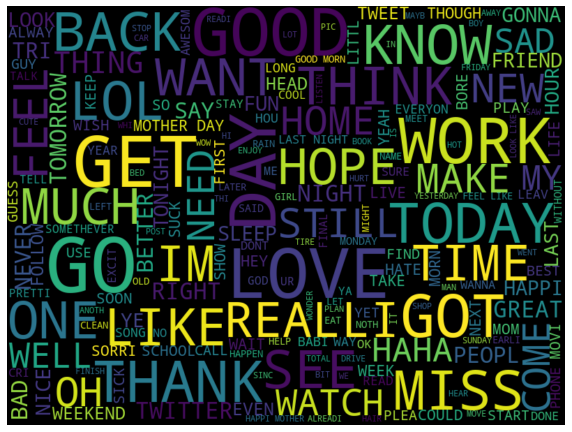

In [14]:
#For neutral sentiment
neu = ' '.join([text for text in df['text'][df['sentiment'] == 'neutral']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(neu)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# MODELLING

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=5000, max_df=0.7)  
x = tfidfconverter.fit_transform(df['text']).toarray()

In [69]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24)

### LOGISTIC REGRESSION

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 1000000)
#scores = cross_val_score(lr, x_train,y_train, cv=10)
logreg = lr.fit(x_train,y_train)
prediction = logreg.predict(x_test)
metrics.accuracy_score(y_test,prediction)

0.8302687411598303

In [71]:
metrics.confusion_matrix(y_test, prediction)

array([[ 12,  76,   0],
       [  0, 571,   0],
       [  1,  43,   4]], dtype=int64)

In [63]:
print(classification_report(y_test, prediction))
#accuracy of 83

              precision    recall  f1-score   support

    negative       0.92      0.14      0.24        88
     neutral       0.83      1.00      0.91       571
    positive       1.00      0.08      0.15        48

    accuracy                           0.83       707
   macro avg       0.92      0.41      0.43       707
weighted avg       0.85      0.83      0.77       707



### NAIVE BAIYES 

In [64]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(x_train, y_train)
prediction = naive.predict(x_test)

metrics.accuracy_score(y_test, prediction)

0.8076379066478077

In [65]:
metrics.confusion_matrix(y_test, prediction)

array([[  0,  88,   0],
       [  0, 571,   0],
       [  0,  48,   0]], dtype=int64)

In [66]:
print(classification_report(y_test, prediction))
#accuracy of 81

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        88
     neutral       0.81      1.00      0.89       571
    positive       0.00      0.00      0.00        48

    accuracy                           0.81       707
   macro avg       0.27      0.33      0.30       707
weighted avg       0.65      0.81      0.72       707

